## Aiport Suvery

* The suvery includes satisfaction rating from all classes of airline passengers rating thier travel not limited to comfort and accessibility.
* The Analysis will lead to better management of passengers, providing with adequet facilities while also improving air traffic and safety.


# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the data from file

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip


In [3]:
survery = pd.read_excel('/workspaces/codespaces-jupyter/data/airport_survey.xlsx')

In [4]:
survery.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


# Data Preprocessing

In [5]:
survery.isna().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
survery[ survery['Arrival Delay'].isna() ]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
246,247,Male,11,Returning,Business,Business,719,38,NaN,1,...,4,4,3,4,4,3,4,4,4,Neutral or Dissatisfied
883,884,Male,39,Returning,Business,Business,396,0,NaN,3,...,3,4,3,3,3,3,3,3,3,Satisfied
1965,1966,Male,36,Returning,Business,Economy,383,2,NaN,4,...,5,2,2,2,2,2,2,2,3,Satisfied
2407,2408,Female,55,Returning,Business,Business,2904,58,NaN,5,...,4,3,4,4,5,4,4,4,4,Neutral or Dissatisfied
2448,2449,Male,21,Returning,Personal,Economy Plus,767,5,NaN,3,...,4,1,2,1,1,2,1,1,1,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129000,129001,Male,46,First-time,Business,Business,2704,7,NaN,3,...,4,4,2,4,4,4,3,4,3,Neutral or Dissatisfied
129003,129004,Female,17,First-time,Business,Economy,2704,0,NaN,3,...,2,1,4,1,1,3,3,1,4,Neutral or Dissatisfied
129014,129015,Male,57,Returning,Business,Business,2704,0,NaN,4,...,4,4,4,5,2,4,4,4,4,Satisfied
129015,129016,Female,22,Returning,Business,Business,2611,8,NaN,3,...,4,4,3,4,4,4,3,4,3,Satisfied


In [7]:
#Cleaning the field - Replacing NaN with 0
survery['Arrival Delay'] = survery['Arrival Delay'].fillna(0)

In [8]:
survery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [9]:
survery.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Data Analysis

### Insight 1

* Which percentage of airline passengers are satisfied?
* Does it vary by customer type?
* What about type of travel?

In [10]:
survery['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [11]:
# Total number of rating
survey_satisfaction = survery.groupby('Satisfaction', as_index= False)['ID'].count()

#Rename axis to make is appropriate
survey_satisfaction = survey_satisfaction.rename( {'ID' : 'Total_Rating'}, axis =1)


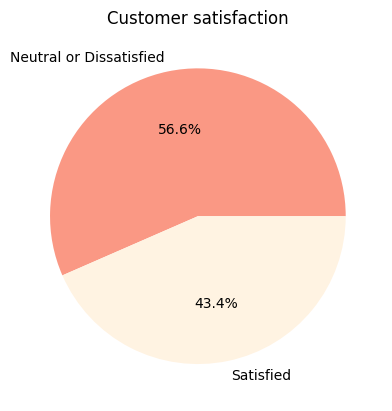

In [12]:
#Colours for wedges

colour = ['#FA9884', '#FFF3E2']

plt.pie(survey_satisfaction['Total_Rating'], labels= survey_satisfaction['Satisfaction'], autopct= '%1.1f%%', colors=colour)

plt.title('Customer satisfaction')

plt.show()

* 1 in 2 Passengers have either dissatisfactory or neutral expirience in thier travel.
* Over 56% had non-satisfactory experience , this leads us to analyse what are the type of pasangers who had the most non-satisfactory expirience

### Analysing the Satisfaction level among passengers from different age group

In [13]:
# function to map ages to age groups
def age_group(age):
    if age < 13:
        return 'Youths'
    elif age >= 13 and age < 20:
        return 'Teenagers'
    elif age >= 20 and age < 30:
        return 'Zoomers'
    elif age >= 30 and age < 50:
        return 'Boomers'
    else: 
        return 'Pretty old yet expirienced'

# Apply the function to the Age column using pd.map
survery['Age Group'] = survery['Age'].map(age_group)


In [14]:
# Finding the satisfactory state of each group

age_satifaction = survery.groupby(['Age Group', 'Satisfaction'], as_index=False).agg( total_rating = ('ID', 'count'))
age_satifaction = age_satifaction.pivot(index='Age Group', columns='Satisfaction', values='total_rating')

<Figure size 1000x1000 with 0 Axes>

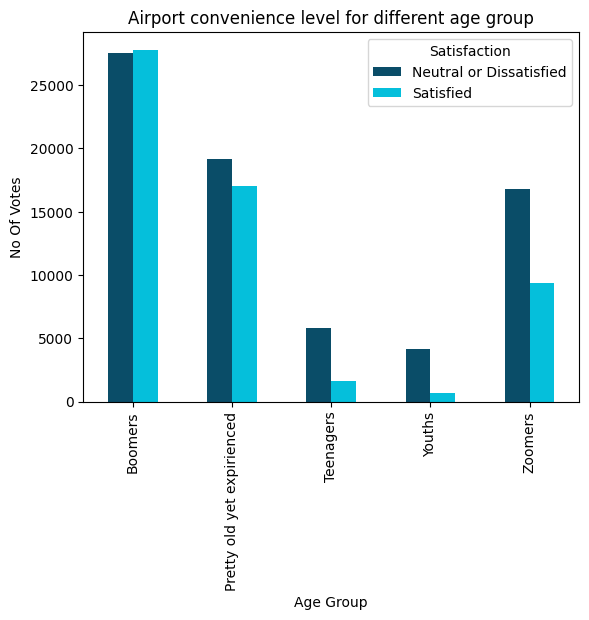

In [15]:
#Plotting satifcation for each group

plt.figure( figsize= (10, 10))

#plt.bar(data=age_satifaction, x = 'Age Group', y=['Neutral or Dissatisfied', 'Satisfied'], height=5)
colour = ['#0A4D68', '#05BFDB']

age_satisfaction_plot = age_satifaction.plot(kind='bar', color=colour)

plt.xticks(rotation = 90)

plt.ylabel('No Of Votes')

plt.title("Airport convenience level for different age group")
plt.show()

* Except for the passengers in their 20s every other passenger age group were dissatisfied with the airport experience.

## Satisfaction of passengers based on the customer type

<Figure size 1000x1000 with 0 Axes>

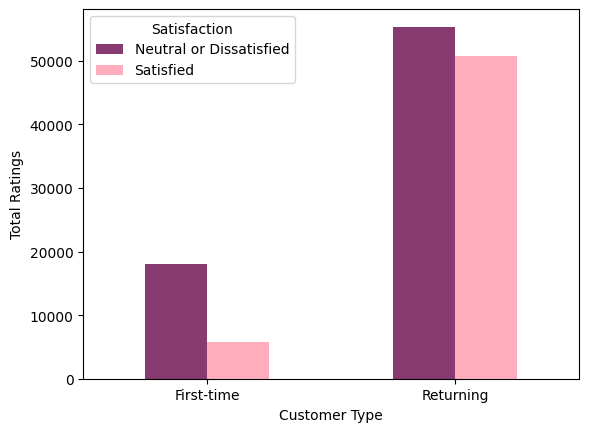

In [16]:
#Customer Type

cust_satisfaction =  survery.groupby(['Customer Type', 'Satisfaction'], as_index=False).agg( total_rating = ('ID', 'count'))

cust_satisfaction = cust_satisfaction.pivot(index='Customer Type', columns='Satisfaction', values='total_rating')

#Plotting for customer type

plt.figure( figsize=(10, 10))

colour = ['#863A6F', '#FFADBC']

cust_satisfaction.plot(kind='bar', rot = 0, color = colour)

plt.ylabel('Total Ratings')

#plt.legend('')
plt.show()

## Satisfaction of passengers based on the travel type

<Figure size 1000x1000 with 0 Axes>

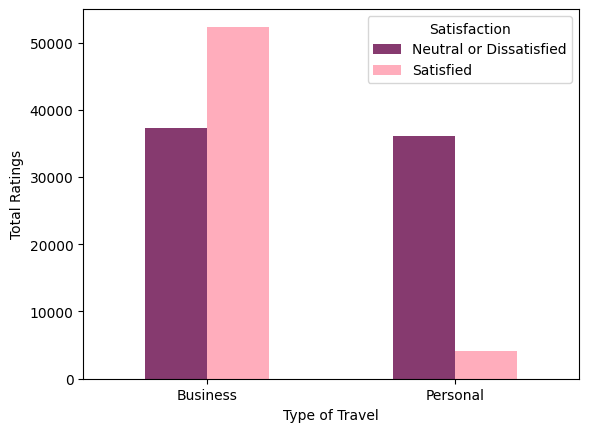

In [17]:
#Type of Travel	

cust_satisfaction =  survery.groupby(['Type of Travel', 'Satisfaction'], as_index=False).agg( total_rating = ('ID', 'count'))

cust_satisfaction = cust_satisfaction.pivot(index='Type of Travel', columns='Satisfaction', values='total_rating')

#Plotting for customer type

plt.figure( figsize=(10, 10))

colour = ['#863A6F', '#FFADBC']

cust_satisfaction.plot(kind='bar', rot = 0, color = colour)

plt.ylabel('Total Ratings')

#plt.legend('')
plt.show()

* Passengers with Business need to travel were very well much satisfied with the convenience .
* This might explain Business travel would have opted for multiple premium services. 

## What is the customer profile for a repeating airline passenger?

In [18]:
repeating_passengers = survery[ survery['Customer Type'] == 'Returning']

In [19]:
# Finding the gender split in returning customers
repeating_passengers.groupby('Gender')['ID'].count()

Gender
Female    53056
Male      53044
Name: ID, dtype: int64

In [20]:
# Understanding what class did most returning passengers preferend

class_repeat = repeating_passengers.groupby(['Gender','Class'], as_index= False).agg( total_passengers = ('ID', 'count'))
#class_repeat

class_repeat = class_repeat.pivot(index='Gender', columns='Class', values='total_passengers')

class_repeat

Class,Business,Economy,Economy Plus
Gender,,,
Female,26494,22317,4245
Male,26435,22358,4251


<Figure size 1000x1000 with 0 Axes>

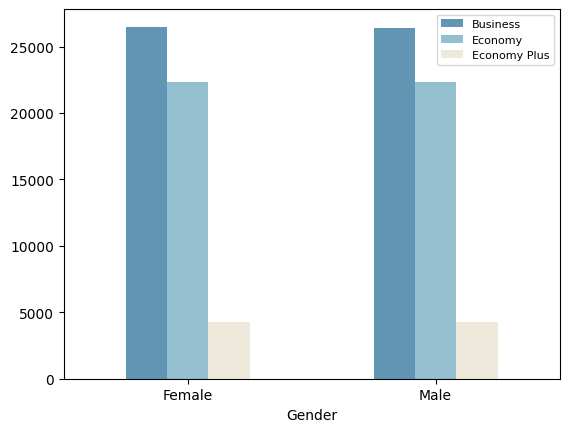

In [21]:
# Plotting the travel preference of male and female passengers 

plt.figure( figsize= (10, 10))
colour = ['#6096B4','#93BFCF','#EEE9DA']

class_repeat.plot( kind= 'bar', rot= 0, color = colour)

plt.legend(fontsize = 8)

plt.show()

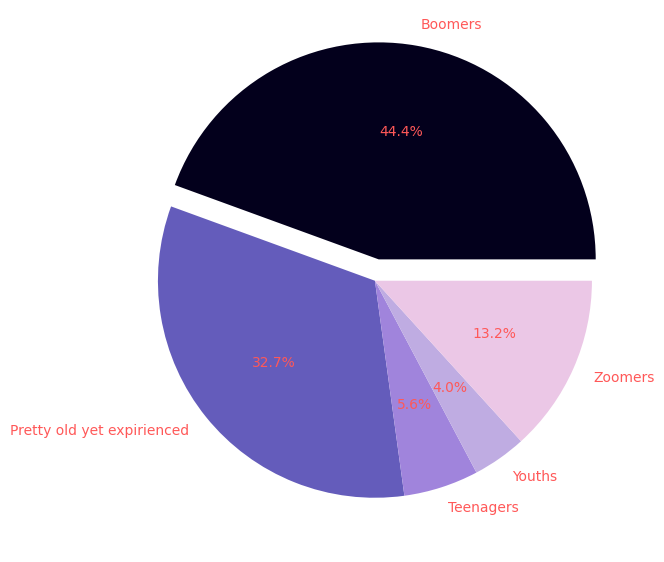

In [22]:
# What is the age group of returning passengers?

age_repeating = repeating_passengers.groupby('Age Group', as_index=False).agg(total_passengers = ('Age Group', 'count'))

plt.figure( figsize=(7,10 ))

explode = (0.1, 0.0,0.0,0.0,0.0)

colours = ['#03001C', '#645CBB', '#A084DC', '#BFACE2', '#EBC7E6']

plt.pie(data= age_repeating,x='total_passengers', autopct='%1.1f%%', labels='Age Group', explode=explode, colors=colours,textprops={'color':"#FF5858"})


plt.show()

<Axes: ylabel='Age Group'>

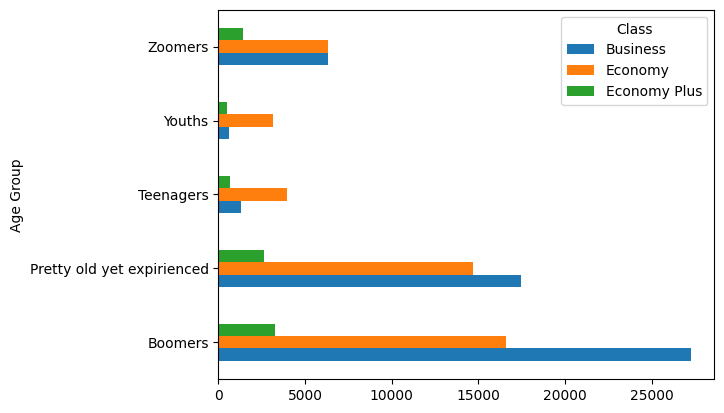

In [23]:
# What is the age group of returning passengers?

age_preference_repeating = repeating_passengers.groupby(['Age Group', 'Class'], as_index=False).agg(total_passengers = ('Age Group', 'count'))
age_preference_repeating = age_preference_repeating.pivot(index='Age Group', columns='Class', values='total_passengers')

age_preference_repeating.plot(kind='barh', rot = 0)


### Customer Profile of returning Passengers.

* Both male and female passengers have the same preference in travel class, Business class was given the most priority as its more comfortable.
* Passengers in the age between 20 - 29 accounted for 44% of all returning passengers , the craze in young adults to explore the world and social media's drive to make travel mainstream can be the reason

In [24]:
survey_data = survery

#Converting columns to IDS to co-relate

survey_data['gender_id'] = survery['Gender'].map({'Male':1, 'Female':0})

survey_data['customer_type_id'] = survery['Customer Type'].map({'Returning':2, 'First-time':1})

survey_data['travel_type_id'] = survery['Type of Travel'].map({'Business':2, 'Personal' : 1})

survey_data['class_id'] = survery['Class'].map({'Business':3, 'Economy':1, 'Economy Plus' : 2})

survey_data['satisfaction_id'] = survery['Satisfaction'].map({'Neutral or Dissatisfied':1, 'Satisfied' :2})


In [25]:
import seaborn as sns 

#satisfaction_correlation = 

survey_data.columns
"""['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Age Group', 'gender_id', 'customer_type_id', 'travel_type_id',
       'class_id', 'satisfaction_id']"""

#Selecting the columns requyired to understand corelation
satisfaction_correlation = survey_data[['gender_id', 'customer_type_id', 'travel_type_id',
       'class_id', 'satisfaction_id','Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]


satisfaction_correlation.corr()

/tmp/ipykernel_1413/1474637236.py:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  satisfaction_correlation.corr()


,gender_id,customer_type_id,travel_type_id,class_id,satisfaction_id,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
gender_id,1.000000,0.030958,-0.009503,0.005774,0.011236,0.008996,0.003616,0.003491,0.001286,0.008995,...,-0.000863,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356
customer_type_id,0.030958,1.000000,-0.308236,0.105641,0.186017,0.284172,0.226021,-0.003859,-0.004769,0.206873,...,-0.004465,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874
travel_type_id,-0.009503,-0.308236,1.000000,0.545447,0.449861,0.044808,0.266792,0.005913,0.005972,-0.257102,...,0.029869,0.059794,0.127717,0.139612,0.084615,0.068986,0.023538,0.105865,0.152936,0.033012
class_id,0.005774,0.105641,0.545447,1.000000,0.492947,0.140504,0.450814,-0.009877,-0.013974,-0.089976,...,0.005861,0.211103,0.227368,0.206129,0.138491,0.088253,0.155864,0.036869,0.196246,0.161364
satisfaction_id,0.011236,0.186017,0.449861,0.492947,1.000000,0.134091,0.298085,-0.050740,-0.058145,-0.054270,...,-0.002793,0.322205,0.348829,0.312424,0.307035,0.211340,0.244918,0.283460,0.398234,0.248680
Age,0.008996,0.284172,0.044808,0.140504,0.134091,1.000000,0.099459,-0.009041,-0.011206,0.036960,...,-0.000398,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991
Flight Distance,0.003616,0.226021,0.266792,0.450814,0.298085,0.099459,1.000000,0.002402,-0.001973,-0.018914,...,0.005520,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855
Departure Delay,0.003491,-0.003859,0.005913,-0.009877,-0.050740,-0.009041,0.002402,1.000000,0.959382,0.000778,...,0.005973,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105
Arrival Delay,0.001286,-0.004769,0.005972,-0.013974,-0.058145,-0.011206,-0.001973,0.959382,1.000000,-0.001005,...,0.005643,-0.034671,-0.030397,0.011384,-0.016547,-0.031685,-0.059685,-0.017762,-0.030183,-0.007997
Departure and Arrival Time Convenience,0.008995,0.206873,-0.257102,-0.089976,-0.054270,0.036960,-0.018914,0.000778,-0.001005,1.000000,...,0.447510,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833


/tmp/ipykernel_1413/3105462297.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(satisfaction_correlation.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 5})


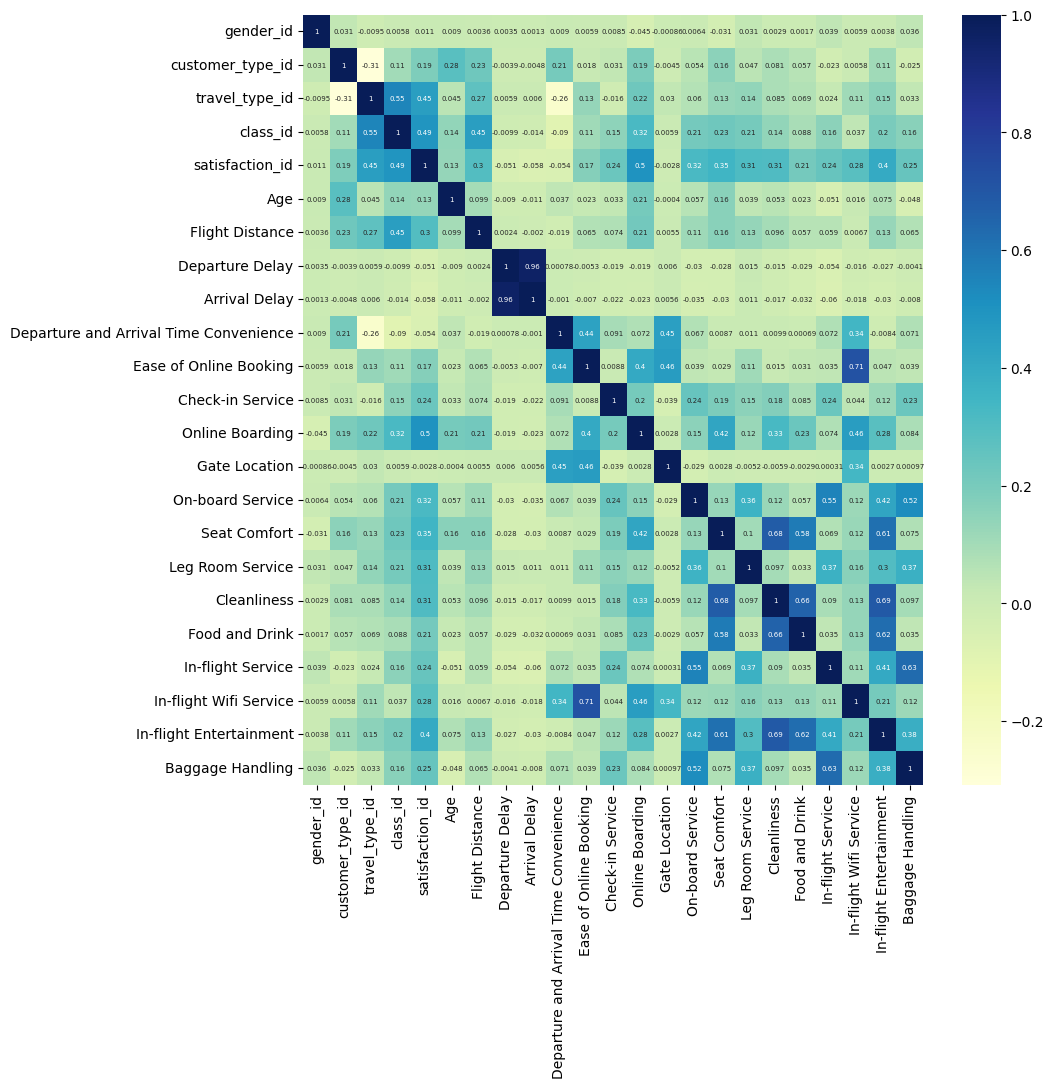

In [26]:
plt.figure(figsize=(10,10))

dataplot = sns.heatmap(satisfaction_correlation.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 5})
  
# displaying heatmap
plt.show()

In [27]:
short_flight = survery['Flight Distance'].min()
long_flight = survery['Flight Distance'].max()

regular_flight = survery['Flight Distance'].mean()

In [28]:
def flight_distance (distance):

    if distance >= short_flight and distance < regular_flight/2:
        return 'Short'
    elif distance >= regular_flight/2 and distance < regular_flight:
        return 'Regular'
    else :
        return 'Long'


survey_data['flight_distance_group'] = survery['Flight Distance'].map(flight_distance)

In [29]:
survey_data['flight_distance_id'] = survey_data['flight_distance_group'].map({'Short':1, 'Regular':2, 'Long':3})

In [30]:
satisfaction_correlation = survey_data[['gender_id', 'customer_type_id', 'travel_type_id',
       'class_id', 'satisfaction_id','flight_distance_id','Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]

Text(0.5, 1.0, 'Flight travel class preference based on journey distance')

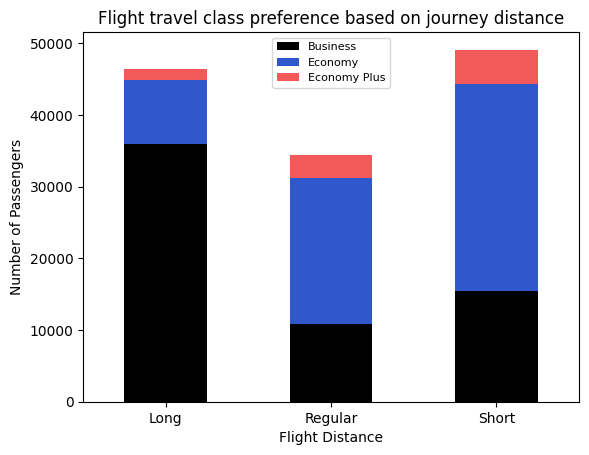

In [31]:
distance_class_preference = survey_data.groupby(['flight_distance_group', 'Class'], as_index=False).agg( num_of_passengers = ('Class', 'count'))

distance_class_preference = distance_class_preference.pivot(index='flight_distance_group', columns='Class', values='num_of_passengers')

colour = ['#000000', '#2F58CD', '#F15A59']

distance_class_preference.plot(kind='bar', stacked=True, color = colour)

plt.legend(fontsize = 8)

plt.xlabel('Flight Distance')
plt.ylabel('Number of Passengers')

plt.xticks(rotation = 0)

plt.title('Flight travel class preference based on journey distance')

* Business class is the most prefered travel class when it comes to long ditance commute.
* Economy is prefered for more than 70% of the short travels.

In [32]:
survey_data.corrwith(survey_data['flight_distance_id'])

/tmp/ipykernel_1413/2345710155.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survey_data.corrwith(survey_data['flight_distance_id'])


ID                                        0.128711
Age                                       0.062295
Flight Distance                           0.848233
Departure Delay                           0.005075
Arrival Delay                            -0.001164
Departure and Arrival Time Convenience    0.000079
Ease of Online Booking                    0.059647
Check-in Service                          0.070809
Online Boarding                           0.179514
Gate Location                             0.000633
On-board Service                          0.096521
Seat Comfort                              0.134047
Leg Room Service                          0.113112
Cleanliness                               0.082555
Food and Drink                            0.047723
In-flight Service                         0.058780
In-flight Wifi Service                    0.008019
In-flight Entertainment                   0.105384
Baggage Handling                          0.055956
gender_id                      

## Factors contributing to customer satisfaction the most.

In [33]:
survey_data.corrwith(survey_data['satisfaction_id']).sort_values()

/tmp/ipykernel_1413/2522197961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  survey_data.corrwith(survey_data['satisfaction_id']).sort_values()


Arrival Delay                            -0.058145
Departure and Arrival Time Convenience   -0.054270
Departure Delay                          -0.050740
Gate Location                            -0.002793
gender_id                                 0.011236
ID                                        0.013182
Age                                       0.134091
Ease of Online Booking                    0.168877
customer_type_id                          0.186017
Food and Drink                            0.211340
Check-in Service                          0.237252
In-flight Service                         0.244918
flight_distance_id                        0.246310
Baggage Handling                          0.248680
In-flight Wifi Service                    0.283460
Flight Distance                           0.298085
Cleanliness                               0.307035
Leg Room Service                          0.312424
On-board Service                          0.322205
Seat Comfort                   

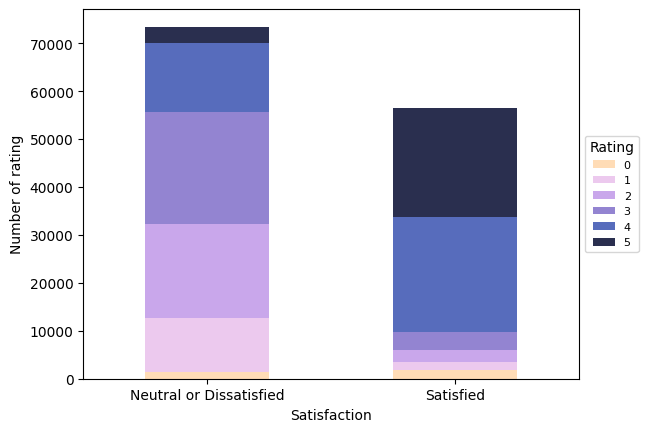

In [34]:
online_boarding = survey_data.groupby(['Satisfaction','Online Boarding'], as_index=False).agg(rating = ('Online Boarding','count'))

online_boarding = online_boarding.pivot(index='Satisfaction', columns='Online Boarding', values='rating')

colour = ['#FFDCB6', '#ECC9EE', '#C9A7EB', '#9384D1','#576CBC', '#2A2F4F']

online_boarding.plot(kind='bar', stacked=True, color = colour)

plt.ylabel('Number of rating')

plt.xticks(rotation = 0)

plt.legend(title ='Rating', fontsize = 8, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

* Most satisfied passengers found online-boarding most comfortable 